# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [1]:
import itertools
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def is_shattered(d,n,S_n):
      #generate different assignments of classes
      list_of_numbers = np.ones(2*n)
      for i in range(n):
            list_of_numbers[i+n]=2
      r=n
      list_of_permutations = list(set(list(itertools.permutations(list_of_numbers, r))))
      predictions=[]
      if_separable=[0 for _ in range(len(list_of_permutations))]
      #for y in different assigment of classes to points in S_n:
      for i, permutation in enumerate(list_of_permutations):
            if sum(permutation)!=n and sum(permutation)!=2*n: #for all points the same, there will also be a linear function
                  svm = SVC(C=10000, shrinking=False, kernel="linear", tol=1e-5)
                  svm.fit(S_n, permutation)
                  if np.array_equal(svm.predict(S_n), permutation):
                        if_separable[i]=1
            else:
                  if_separable[i]=1
      return if_separable, list_of_permutations, predictions

In [3]:
d=2
n=3
S_n=[[0,0], [0,4], [2,2]]

if_separable, _, _ = is_shattered(d,n,S_n)
print(if_separable)

[1, 1, 1, 1, 1, 1, 1, 1]


In [5]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
# def is_shattered(d, n, S_n):
    
#     for y in different assigment of classes to points in S_n:
#         check if they are linearly separable
#         i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0
#
#     if for at least for one y the answer is no, then return False, else return True
#     return True/False

### c)

In [6]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

In [7]:
d=2
n=4
S_n=[[0,0], [0,4], [2,2], [3,3]]
is_linear, list_of_permutations, predictions = is_shattered(d,n,S_n)

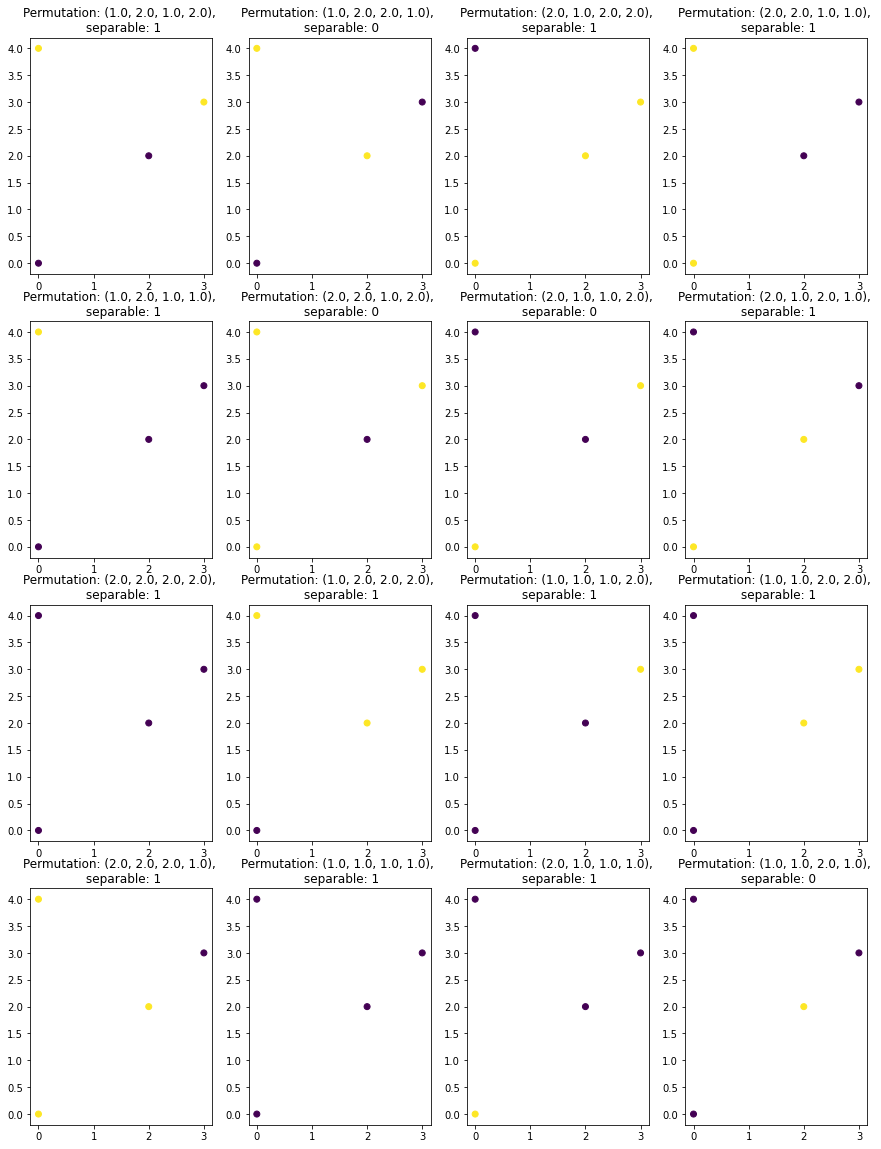

In [8]:
num_of_permutations = len(list_of_permutations)
num_col = 4
num_rows = (num_of_permutations+num_col-1)//num_col

fig, axs = plt.subplots(num_rows, num_col, figsize=(15, 5*num_rows))

for i, permutation in enumerate(list_of_permutations):
    row = i //num_col
    col = i % num_col
    if num_rows == 1:
        ax = axs[col]
    else:
        ax = axs[row, col]
    ax.scatter([p[0] for p in S_n], [p[1] for p in S_n], c=permutation)
    ax.set_title(f"Permutation: {permutation}, \n separable: {is_linear[i]}")

plt.show()

### d)

In [4]:
# code

N=5
d_list = [2,3,4,5,6,7,8,9,10]
n_list = [2,3,4,5,6,7,8,9,10,11]

vc_list=[0 for _ in d_list]

for j, d in enumerate(d_list):
    for n in n_list:
        # for N
        for i in range(N):
            n_max=0
            S_n = np.random.multivariate_normal(mean=np.zeros(d),
                                                cov=np.eye(d), size=n)
            #check if shattered
            if_separable, _, _ = is_shattered(d,n,S_n)
            if len(np.unique(if_separable))==1 and if_separable[0]==1:
                print(f"For d {d}, n {n}, N {N} is separable.")
                if n>n_max:
                    n_max=n
            # else:
                # print(f"For d {d}, n {n}, N {N} is not separable.")
            vc_list[j]=n

For d 2, n 2, N 5 is separable.
For d 2, n 2, N 5 is separable.
For d 2, n 2, N 5 is separable.
For d 2, n 2, N 5 is separable.
For d 2, n 2, N 5 is separable.
For d 2, n 3, N 5 is separable.
For d 2, n 3, N 5 is separable.
For d 2, n 3, N 5 is separable.
For d 2, n 3, N 5 is separable.
For d 2, n 3, N 5 is separable.


In [ ]:
vc_list

### e)

In [ ]:
# A hint: change a kernel in SVM